In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from datetime import datetime
from sklearn import set_config
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
set_config(display='diagram')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/Users/azin/code/azinmjalali/ChangeDEEPly/raw_data/df_full_withtime.csv") 
df.head(2)

,Unnamed: 0,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
0,7084339,24057,df8ec8baa5af2f61e5426307be9a5e75,load_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436084,0.0
1,7084345,24057,df8ec8baa5af2f61e5426307be9a5e75,play_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436087,3.0


In [13]:
8291326*0.000002

16.582652

In [14]:
df_train, df_test = train_test_split(df, test_size=0.000002, random_state=42)

In [15]:
df_test.shape

(17, 14)

In [16]:
df_train.shape

(8291309, 14)

In [17]:
df_train.to_csv('/Users/azin/code/azinmjalali/ChangeDEEPly/raw_data/df_full_withtime_train.csv')
df_test.to_csv('/Users/azin/code/azinmjalali/ChangeDEEPly/raw_data/df_full_withtime_predict.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

<AxesSubplot:xlabel='action', ylabel='Count'>

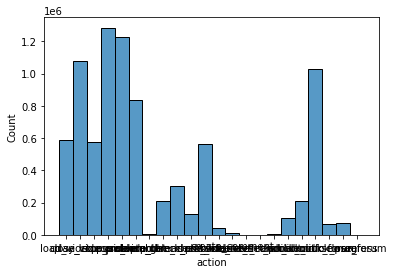

In [7]:
plt.figure(figsize = (1))
sns.histplot(df["action"])

In [ ]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.plot(years_x, coal_y, label="Drop out")
plt.plot(years_x, gas_y, label = "gas")
plt.title('coal vs. gas')
plt.legend()
# Second subplot
plt.subplot(1,2,2) 
plt.plot(years_x, total_y, label="total", c='black')
plt.title("all energies")
# Global figure methods
plt.suptitle('US electricity CO2 emissions')
plt.show()

In [ ]:
# Destructuring initialization
fig, axs = plt.subplots(1, 2, figsize=(10,3)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(years_x, coal_y, label="coal")
axs[0].plot(years_x, gas_y, label = "gas")
axs[0].set_title('coal vs. gas')
axs[0].legend()
# Second subplot
axs[1].plot(years_x, total_y, c='black')
axs[1].set_title('all energies')
# Global figure methods
plt.suptitle('US electricity CO2 emissions')
plt.show()

In [102]:
for_plotting = df
for_plotting.head()

,Unnamed: 0,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff,count
0,7084339,24057,df8ec8baa5af2f61e5426307be9a5e75,load_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436084,0.0,1
1,7084345,24057,df8ec8baa5af2f61e5426307be9a5e75,play_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436087,3.0,1
2,7084340,24057,df8ec8baa5af2f61e5426307be9a5e75,close_courseware,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436102,15.0,1
3,16055144,670347,95925c14aa0a330a541359eb244352e4,stop_video,1,34,2015-05-05 08:00:00,2015-09-10 01:00:00,social science,male,Bachelor's,1993.0,1433436152,0.0,1
4,16055145,670347,95925c14aa0a330a541359eb244352e4,pause_video,1,34,2015-05-05 08:00:00,2015-09-10 01:00:00,social science,male,Bachelor's,1993.0,1433436152,0.0,1


In [103]:
for_plotting = df
for_plotting['count'] = 1
for_plotting = for_plotting.groupby(['username','id', 'action']).sum()
for_plotting = for_plotting.reset_index()
for_plotting.head()

,username,id,action,Unnamed: 0,truth,birth,timestamp,timediff,count
0,6938,34,close_courseware,144493256,9,17838.0,12902193563,50527.0,9
1,6938,34,load_video,48164456,3,5946.0,4300660906,8.0,3
2,6938,34,pause_video,80274097,5,9910.0,7167735163,223.0,5
3,6938,34,play_video,80274106,5,9910.0,7167734752,792.0,5
4,6938,34,problem_check,96328813,6,11892.0,8601526569,903.0,6


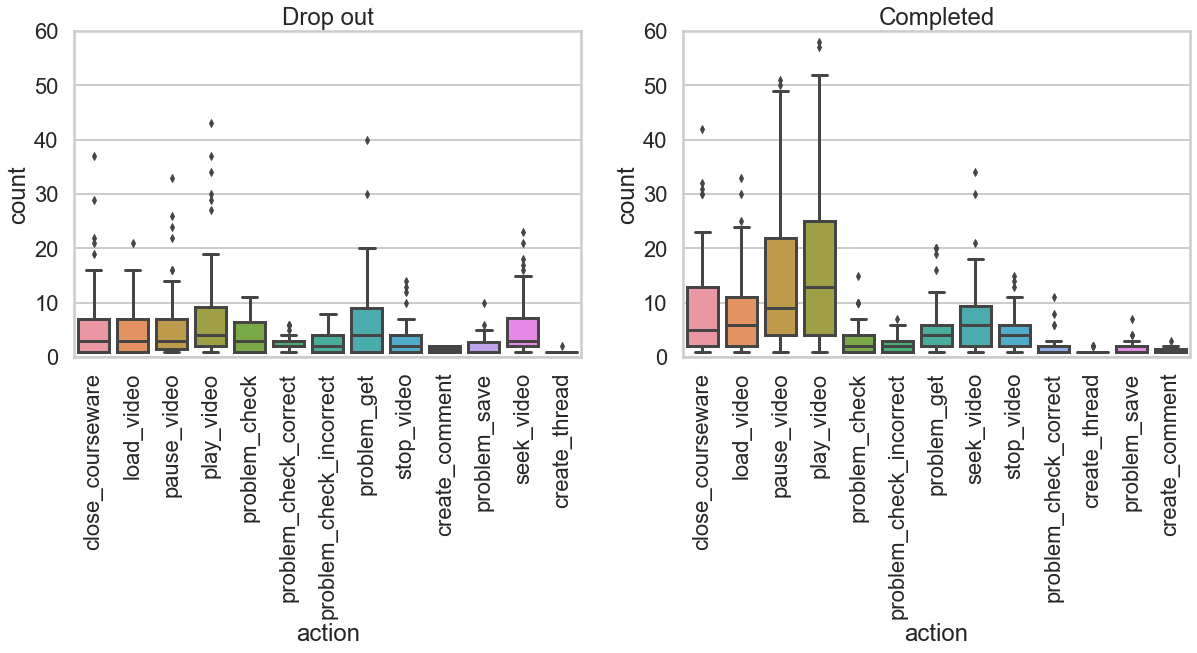

In [108]:
sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Drop out')
sns.boxplot(data=for_plotting[for_plotting['truth'] >= 1], x="action", y="count")
plt.xticks(rotation = 90)
plt.ylim(0, 60)

plt.subplot(1, 2, 2)
plt.title('Completed')
sns.boxplot(data=for_plotting[for_plotting['truth'] == 0], x="action", y="count")
plt.xticks(rotation = 90);
plt.ylim(0, 60);

In [68]:
df['category'].nunique()

17

In [45]:
df.shape

(8322174, 14)

In [3]:
df = df[df['birth']<2010]

In [75]:
df.shape

(10000, 14)

In [4]:
df = df.reset_index(drop=True)

In [5]:
def remove_duplicates(data):
    return pd.DataFrame(data).drop_duplicates()

def age_constructor(data):
    return pd.DatetimeIndex(pd.to_datetime(data['start'], format='%Y/%m/%d')).year - pd.DatetimeIndex(pd.to_datetime(data['birth'], format='%Y')).year

def array_reshape(data):
    output = np.reshape(data, (-1, 1))
    return output

def action_time(data):
    ohe_action = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe_action.fit(data[['action']]) # Fit encoder
    action_encoded = ohe_action.transform(data[['action']])
    action_X = pd.DataFrame(action_encoded)
    timediff = list(data['timediff'])
    for row in range(len(action_X.index)):
        action_X.iloc[row,action_X.columns[action_X.iloc[row,] == 1][0]] = timediff[row]
    action_X['username'] = data[['username']]
    action_X['id'] = data[['id']]
    return action_X

def combining_actions(dataframe):
    output_df = dataframe.groupby(['username', 'id']).sum()
    return output_df

def keep_unchanged(data):
    return pd.DataFrame(data[["truth", "username", "id"]])

# def calc_percentage_course(df):
#     df['course_start'] = pd.to_datetime(df['start'])
#     df['course_start'] = df.course_start.values.astype(np.int64) // 10 ** 9
#     df['course_end'] = pd.to_datetime(df['end'])
#     df['course_end'] = df.course_end.values.astype(np.int64) // 10 ** 9
#     #df = df.drop(['start'], axis = 1)
#     #df = df.drop(['end'], axis = 1)
#     df['percent_course'] = (df['timestamp'] - df['course_start'])/(df['course_end'] - df['course_start'])
#     users_min_30per_comp = df[df['percent_course'] >= 0.3]['username'].unique()
#     df = df[df['username'].isin(users_min_30per_comp)][df['percent_course'] < 0.3]
#     return df

In [6]:
# filtering_pipe = Pipeline([
#     ('first_part_of_the_course', FunctionTransformer(calc_percentage_course))
# ])

gender_pipe = Pipeline([
    ('ohe_gender', OneHotEncoder(drop='if_binary', sparse = False, handle_unknown='ignore'))
])

category_edu_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

keep_unchanged_pipe = Pipeline([
    ('keep_unchanged', FunctionTransformer(keep_unchanged))#,
    #('reshape', FunctionTransformer(array_reshape))
])

age_pipe = Pipeline([
    ('age_calc', FunctionTransformer(age_constructor)),
    ('reshape', FunctionTransformer(array_reshape)),
    ('stdscaler', StandardScaler())
])

actions_pipe = Pipeline([
    ('ohe_action', FunctionTransformer(action_time)),
    ('combining_actions', FunctionTransformer(combining_actions)),
    ('stdscaler', StandardScaler())
])

basic_encoding_pipe = ColumnTransformer([
    ('keep_unchanged', keep_unchanged_pipe, ["truth","username", "id"]),
    ('category_edu_pipe', category_edu_pipe, ["category", "education"]),
    ('gender_pipe', gender_pipe, ["gender"])
], remainder="drop")

preprocessing_pipe = FeatureUnion([
    ('basic_encoding_pipe', basic_encoding_pipe),
    ('age', age_pipe)
])

removing_duplicates_pipe = Pipeline([
    ('preprocessing_pipe', preprocessing_pipe),
    ('remove_duplicates', FunctionTransformer(remove_duplicates))
])

merge_pipe = FeatureUnion([
    ('all_without_duplicates', removing_duplicates_pipe),
    ('actions', actions_pipe)
])

# final_pipe = Pipeline([
#     ('merge_pipe', merge_pipe),
#     ('filtering_pipe', filtering_pipe)
# ])
# final_pipe

In [60]:
test_temp = df.iloc[:50000,]

In [70]:
test_temp.head()

,index,Unnamed: 0,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
0,0,7084339,24057,df8ec8baa5af2f61e5426307be9a5e75,load_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436084,0.0
1,1,7084345,24057,df8ec8baa5af2f61e5426307be9a5e75,play_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436087,3.0
2,2,7084340,24057,df8ec8baa5af2f61e5426307be9a5e75,close_courseware,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436102,15.0
3,3,16055144,670347,95925c14aa0a330a541359eb244352e4,stop_video,1,34,2015-05-05 08:00:00,2015-09-10 01:00:00,social science,male,Bachelor's,1993.0,1433436152,0.0
4,4,16055145,670347,95925c14aa0a330a541359eb244352e4,pause_video,1,34,2015-05-05 08:00:00,2015-09-10 01:00:00,social science,male,Bachelor's,1993.0,1433436152,0.0


In [7]:
df_trans = pd.DataFrame(merge_pipe.fit_transform(df))
df_trans.head(2)

KeyboardInterrupt: 

In [ ]:
y = df_trans[0]
y

In [73]:
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,24057.0,809.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.204656,-0.530274,-0.253380,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.314301,-0.473932
1,1.0,670347.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.213075,-0.266870,-0.232996,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.253050,0.244623
2,1.0,628087.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.213663,-0.443001,-0.235001,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.314301,-0.473932
3,1.0,201332.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.213467,-0.542968,-0.205093,0.451917,-0.054447,-0.195265,-0.113645,-0.247615,0.340616,0.129584
4,0.0,561486.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.213957,-0.547729,-0.255218,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.314301,-0.473932


In [89]:
X = df_trans.drop(columns=[0])
X = X.set_index([1,2])

In [75]:
X.head()

,,3,4,5,6,7,8,9,10,11,12,...,16,17,18,19,20,21,22,23,24,25
1,2,,,,,,,,,,,,,,,,,,,,,
24057.0,809.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.166490,...,-0.204656,-0.530274,-0.253380,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.314301,-0.473932
670347.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.678353,...,-0.213075,-0.266870,-0.232996,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.253050,0.244623
628087.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.537546,...,-0.213663,-0.443001,-0.235001,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.314301,-0.473932
201332.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.588912,...,-0.213467,-0.542968,-0.205093,0.451917,-0.054447,-0.195265,-0.113645,-0.247615,0.340616,0.129584
561486.0,34.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.396738,...,-0.213957,-0.547729,-0.255218,-0.367065,-0.151266,-0.304872,-0.114136,-0.247615,-0.314301,-0.473932


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [92]:
cross_val_score(gbc_model, X_train, y_train, cv = 10 , scoring= 'accuracy').mean()

0.507142857142857

In [93]:
gbc_model.predict(X_test)

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0.])

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [83]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

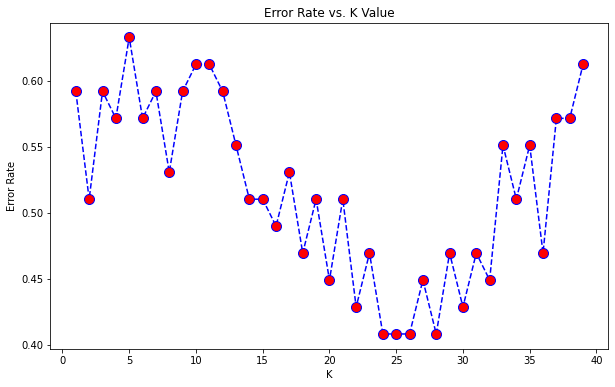

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [85]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [97]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train, cv = 10 , scoring= 'accuracy').mean()

0.6011111111111112